**Parkinson-Disease-Detection**

**About Dataset**
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

**Data Source:https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection**

**Attribute Information**
Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

**Citation Request**
If you use this dataset, please cite the following paper:'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

In [5]:
#importing of main libriries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing of main libriries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, make_scorer, confusion_matrix,classification_report,recall_score,precision_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from collections import Counter
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from imblearn.under_sampling import TomekLinks,EditedNearestNeighbours,RandomUnderSampler
from imblearn.combine import  SMOTETomek, SMOTEENN
from sklearn import tree
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [7]:
pd.set_option("display.max_columns",None) # Max Viewing
PD = pd.read_csv('Parkinsson disease.csv') # importing the data set

In [8]:
PD

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


**Target column: status - Health status of the subject**
* (one) - Parkinson's
* (zero) - healthy

In [10]:
#shape of  the data  
PD.shape 

(195, 24)

In [11]:
# this data is imbalance 
PD['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [12]:
PD.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [13]:
PD.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [14]:
PD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [15]:
#Checking for missing and duplicated data
print("missing_data =",PD.isnull().sum().max())
print("duplicated_data =",PD.duplicated().sum())

missing_data = 0
duplicated_data = 0


In [16]:
# sum of null values
[features for features in PD.columns if PD[features].isnull().sum()>0]

[]

In [17]:
#Droping use less colummns 
PD.drop(columns='name',inplace=True)

In [18]:
PD.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [19]:
# Gethering of numarical Data
num_col= PD.select_dtypes(include='number').columns

In [20]:
num_col

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [21]:
# calculating of Variance
PD_var=PD[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']].var()

In [22]:
PD_var

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

In [23]:
#calculating of Variance
num_col=PD[num_col].corr()

<Axes: >

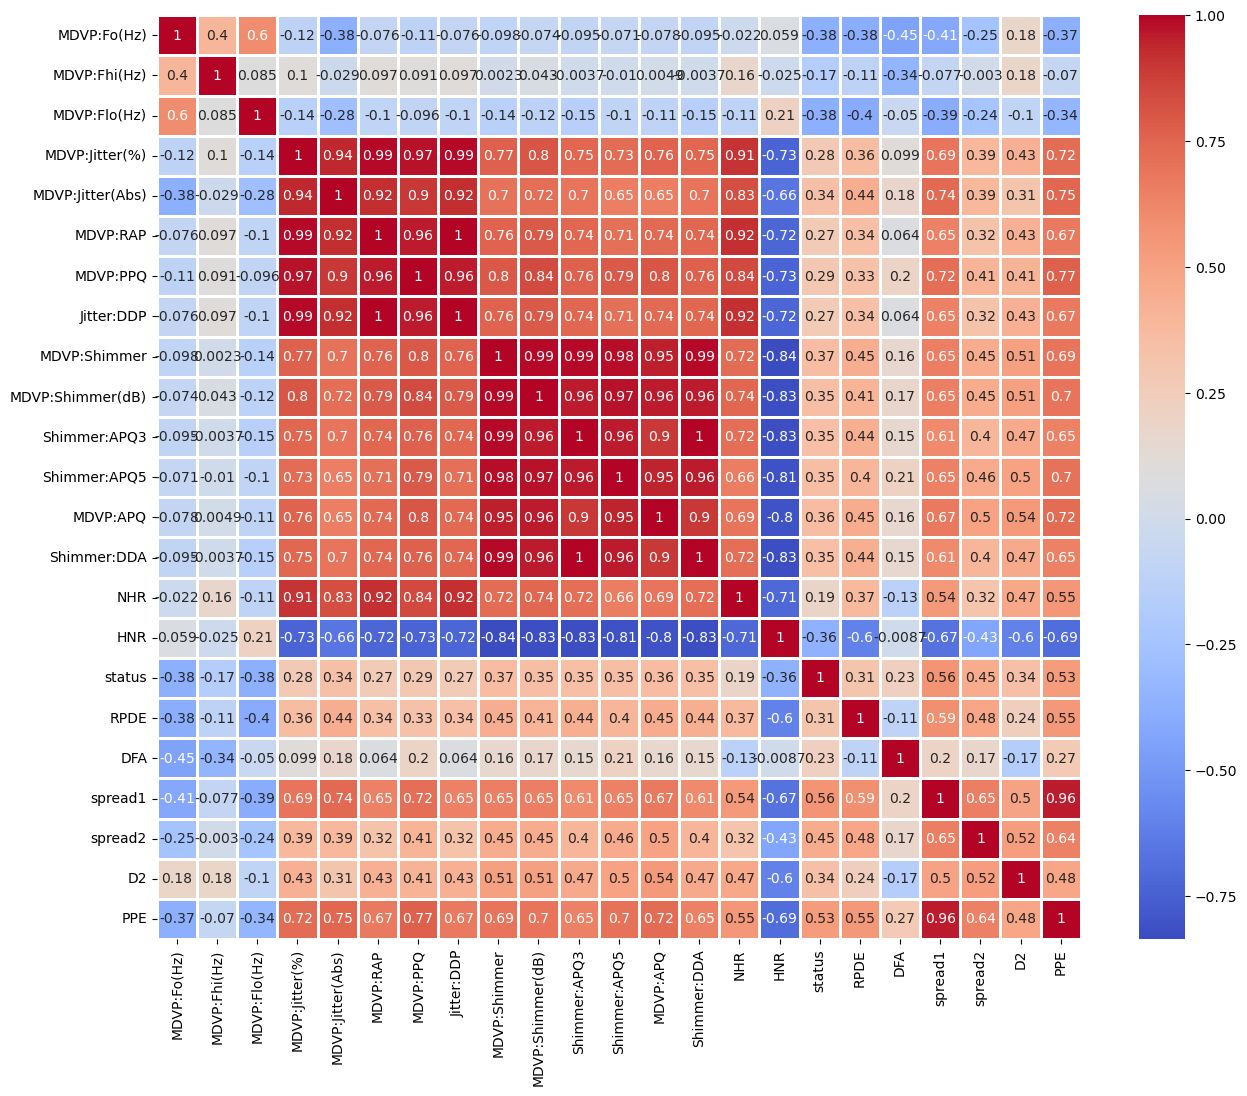

In [24]:
# heat map of correletion
plt.figure(figsize=(15,12))
sns.heatmap(data=num_col,annot=True,fmt='.2g',linewidths=1,cmap='coolwarm', square=True) 

In [25]:
# lefted of high Correletion data using with Mask
threshold=0.9
high_corr_mask=num_col>=threshold
high_corr_pair=np.where(high_corr_mask)
HIGH_corr_col=set()
for i,j in zip(*high_corr_pair):
    if i!=j and j not in HIGH_corr_col:
        HIGH_corr_col.add(PD.columns[j])
        PD.drop(columns=HIGH_corr_col,axis=1)


The code is used to identify and remove highly correlated columns in a pandas DataFrame `PD`. Here's a step-by-step breakdown:

1. `threshold=0.9`: Set a threshold value for correlation (0.9 in this case) to determine which columns are highly correlated.
2. `high_corr_mask=num_col>=threshold`: Create a boolean mask `high_corr_mask` that identifies columns with correlation values greater than or equal to the threshold.
3. `high_corr_pair=np.where(high_corr_mask)`: Find the indices of the highly correlated columns using `np.where`.
4. `HIGH_corr_col=set()`: Initialize an empty set `HIGH_corr_col` to store the names of the highly correlated columns.
5. `for i,j in zip(*high_corr_pair):`: Loop through the indices of the highly correlated columns using `zip(*high_corr_pair)`.
6. `if i!=j and j not in HIGH_corr_col:`: Check if the current pair of columns is not identical (i.e., `i!=j`) and the second column is not already in the set of highly correlated columns (`j not in HIGH_corr_col`).
7. `HIGH_corr_col.add(PD.columns[j])`: Add the name of the second column to the set of highly correlated columns (`HIGH_corr_col`).
8. `PD.drop(columns=HIGH_corr_col,axis=1)`: Drop all columns in the set `HIGH_corr_col` from the original DataFrame `PD`. The `axis=1` parameter specifies that the columns should be dropped.

The goal is to remove highly correlated columns to avoid multicollinearity issues in subsequent analysis or modeling steps.

In [27]:
print(HIGH_corr_col)

{'MDVP:Jitter(%)', 'Shimmer:APQ3', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'PPE', 'NHR', 'MDVP:APQ', 'Jitter:DDP', 'spread1', 'MDVP:RAP', 'MDVP:PPQ', 'MDVP:Jitter(Abs)', 'Shimmer:APQ5', 'Shimmer:DDA'}


In [28]:
PD.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [29]:
#* After Deleted HIGH_corr_columns remaing columns 
Z=PD[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","HNR","RPDE","DFA","spread2","D2"]]

<Axes: >

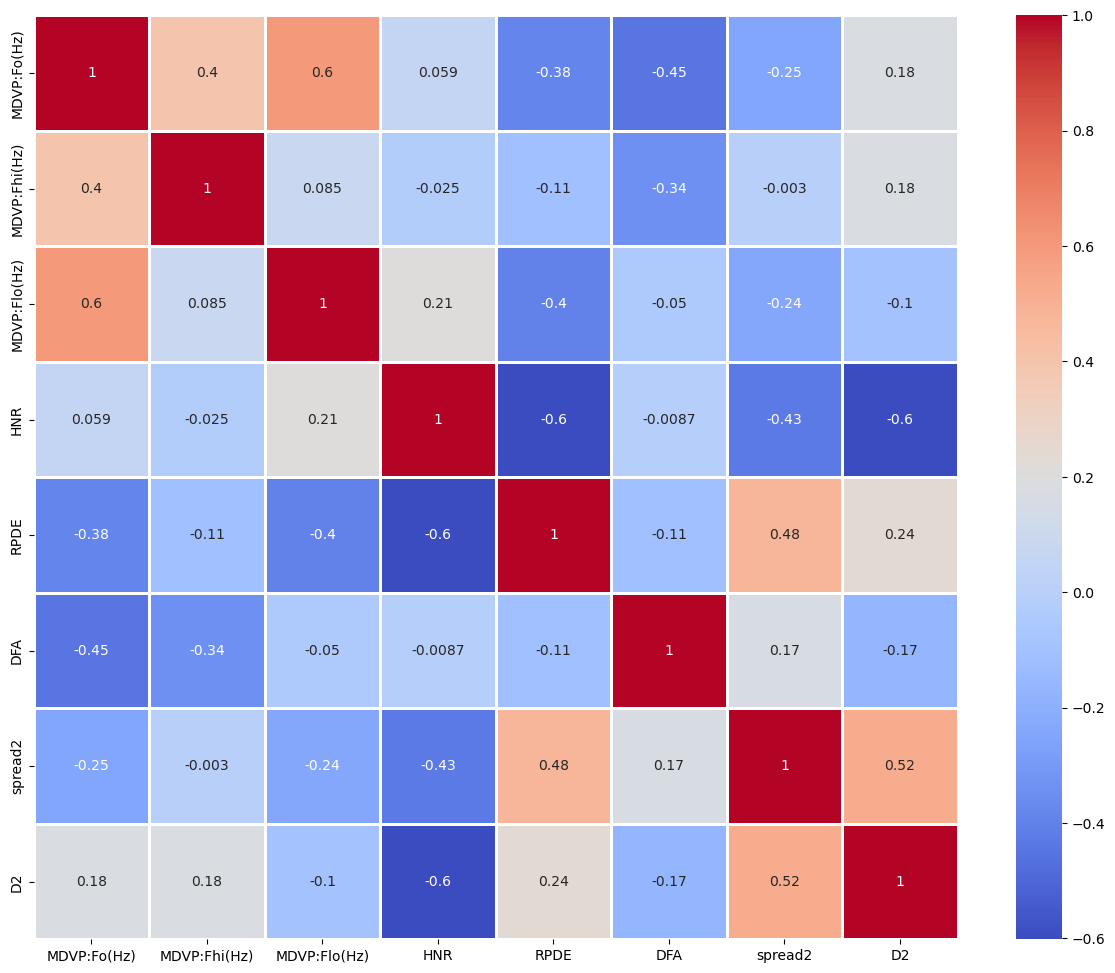

In [30]:
#* After Deleted HIGH_corr_columns remaing columns correlation and heatmap

Z_corr = Z.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data=Z_corr,annot=True,fmt='.2g',linewidths=1,cmap='coolwarm', square=True)

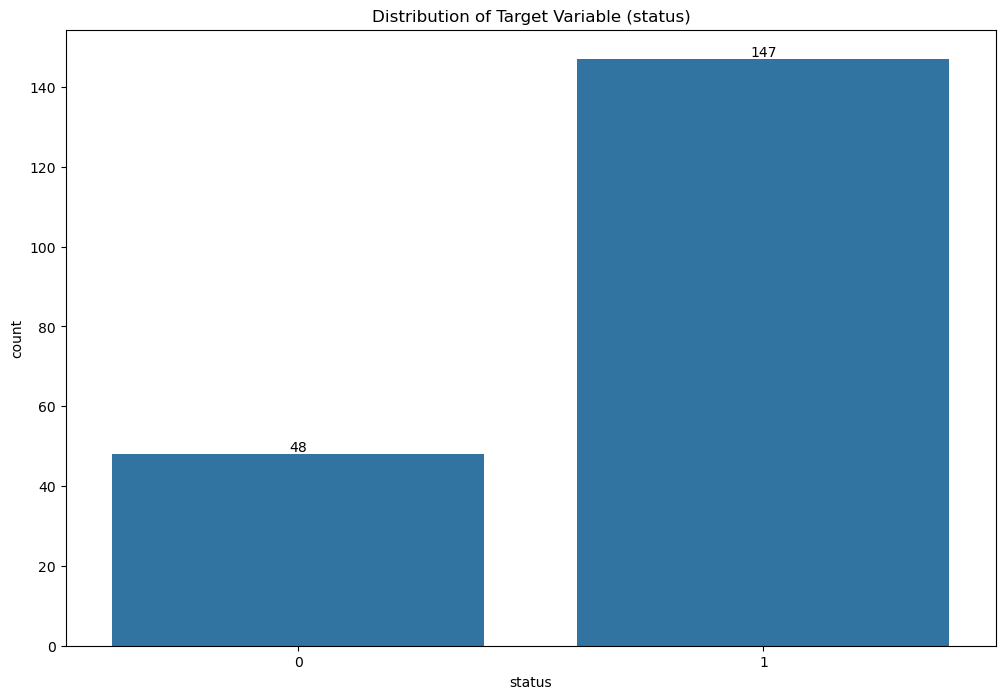

In [31]:
# We are seeing how many people are parkinsson disease  there using on Countplot
plt.figure(figsize=(12,8))


status=sns.countplot(x='status', data=PD)

for i in status.containers:
    plt.title('Distribution of Target Variable (status)')
    status.bar_label(i)
    

**Target column: status - Health status of the subject**
* (one) - Parkinson's
* (zero) - healthy


In [33]:
PD.skew().sort_values(ascending=False)
#calculating the skewness of all parameters

NHR                 4.220709
Jitter:DDP          3.362058
MDVP:RAP            3.360708
MDVP:Jitter(%)      3.084946
MDVP:PPQ            3.073892
MDVP:Jitter(Abs)    2.649071
MDVP:APQ            2.618047
MDVP:Fhi(Hz)        2.542146
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ5        1.798697
MDVP:Shimmer        1.666480
Shimmer:DDA         1.580618
Shimmer:APQ3        1.580576
MDVP:Flo(Hz)        1.217350
PPE                 0.797491
MDVP:Fo(Hz)         0.591737
spread1             0.432139
D2                  0.430384
spread2             0.144430
DFA                -0.033214
RPDE               -0.143402
HNR                -0.514317
status             -1.187727
dtype: float64

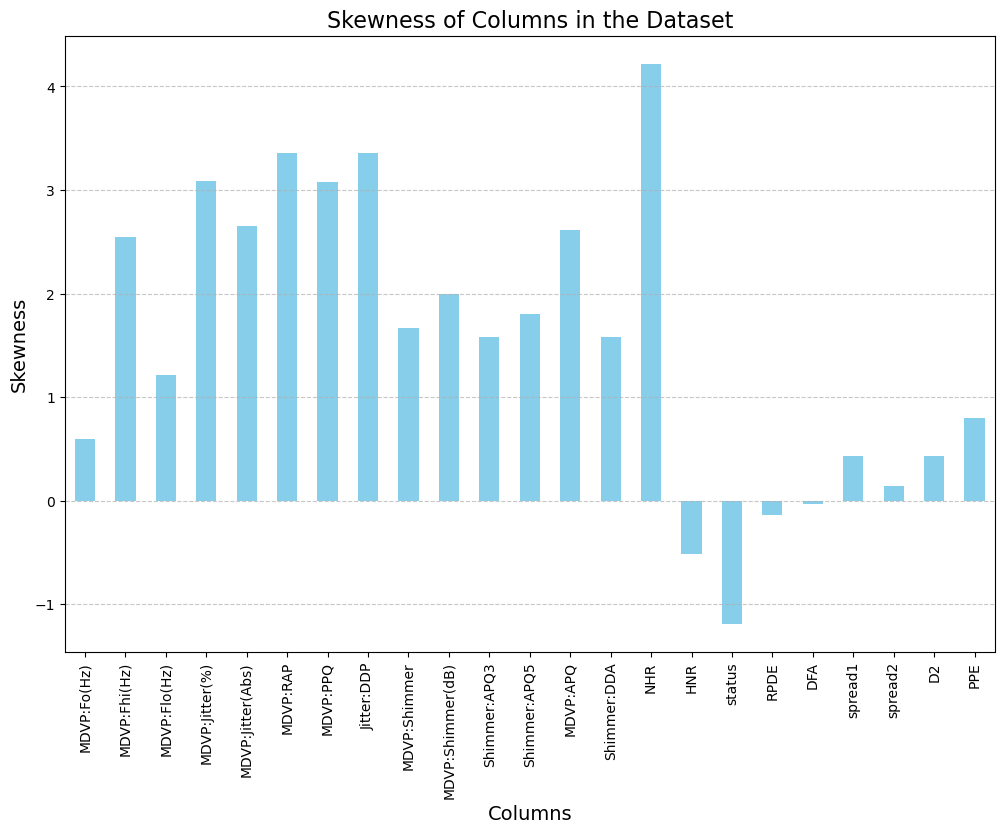

In [34]:
skewness = PD.skew()

plt.figure(figsize=(12, 8))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Columns in the Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Skewness', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
PD.kurt().sort_values(ascending=False)
#calculating the kurtosis of all parameters

NHR                 21.994974
Jitter:DDP          14.224762
MDVP:RAP            14.213798
MDVP:Jitter(%)      12.030939
MDVP:PPQ            11.963922
MDVP:APQ            11.163288
MDVP:Jitter(Abs)    10.869043
MDVP:Fhi(Hz)         7.627241
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ5         3.874210
MDVP:Shimmer         3.238308
Shimmer:DDA          2.720661
Shimmer:APQ3         2.720152
MDVP:Flo(Hz)         0.654615
HNR                  0.616036
PPE                  0.528335
D2                   0.220334
spread1             -0.050199
spread2             -0.083023
status              -0.595518
MDVP:Fo(Hz)         -0.627898
DFA                 -0.686152
RPDE                -0.921781
dtype: float64

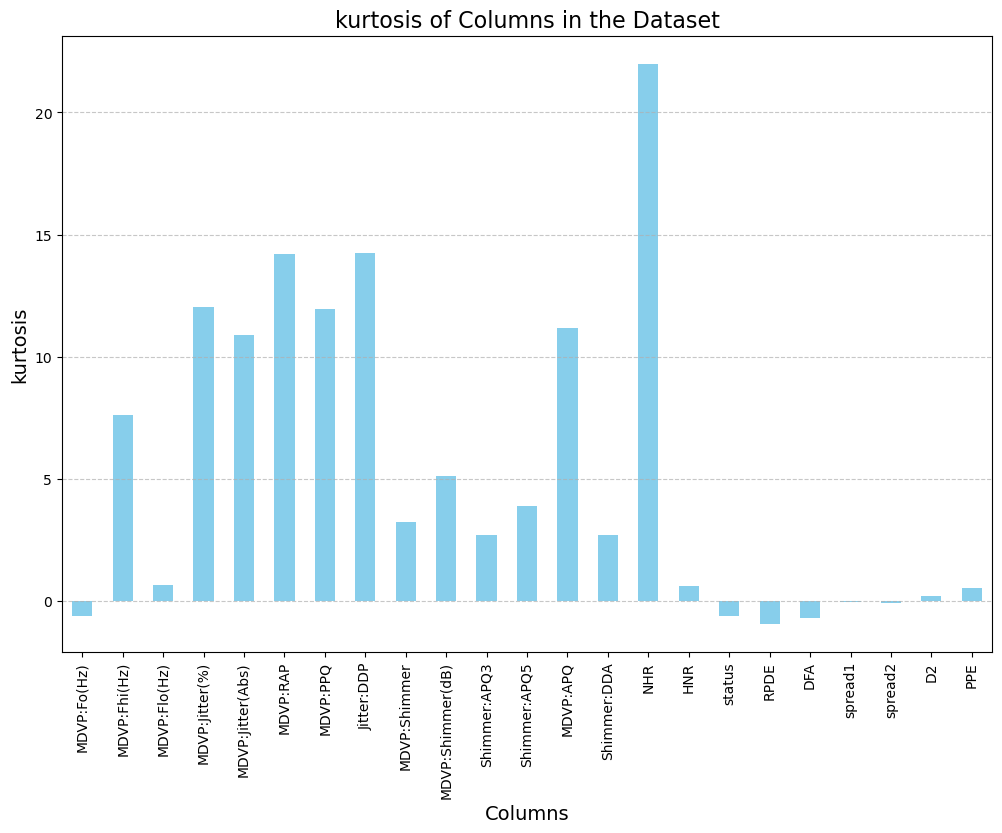

In [36]:
kurtosis = PD.kurt()

plt.figure(figsize=(12, 8))
kurtosis.plot(kind='bar', color='skyblue')
plt.title('kurtosis of Columns in the Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('kurtosis', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

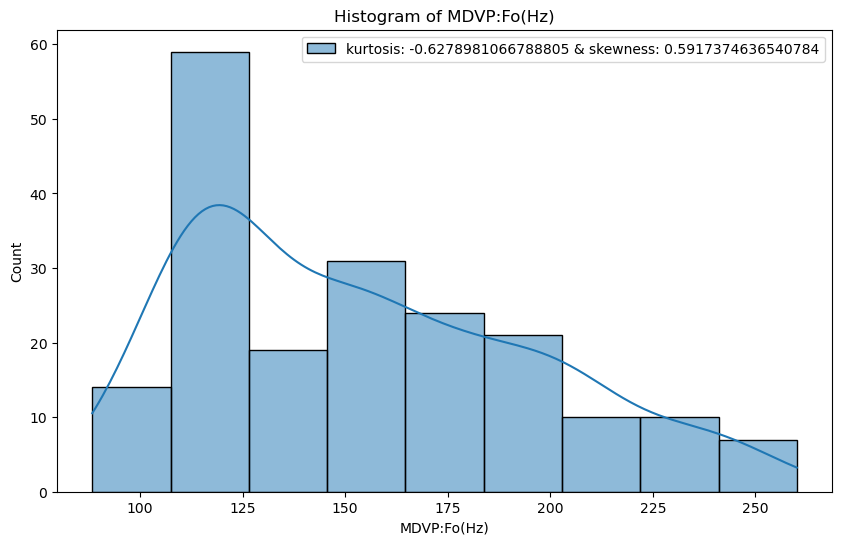

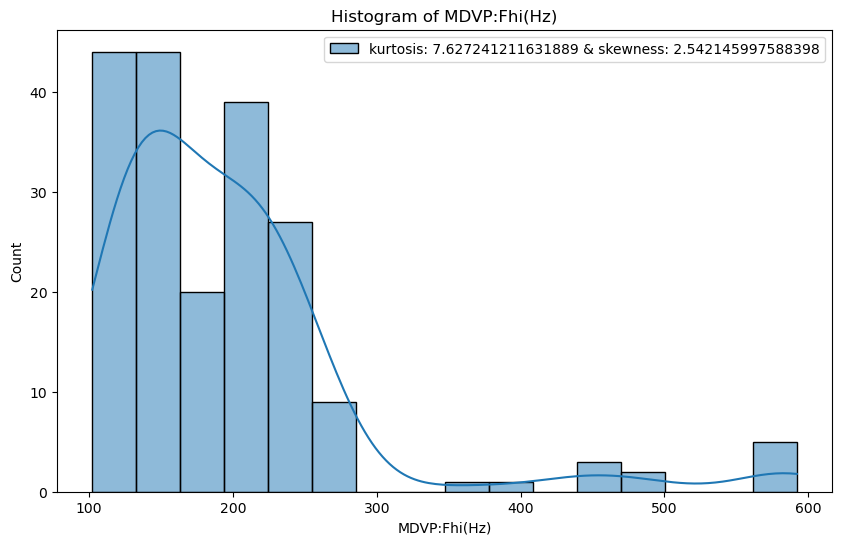

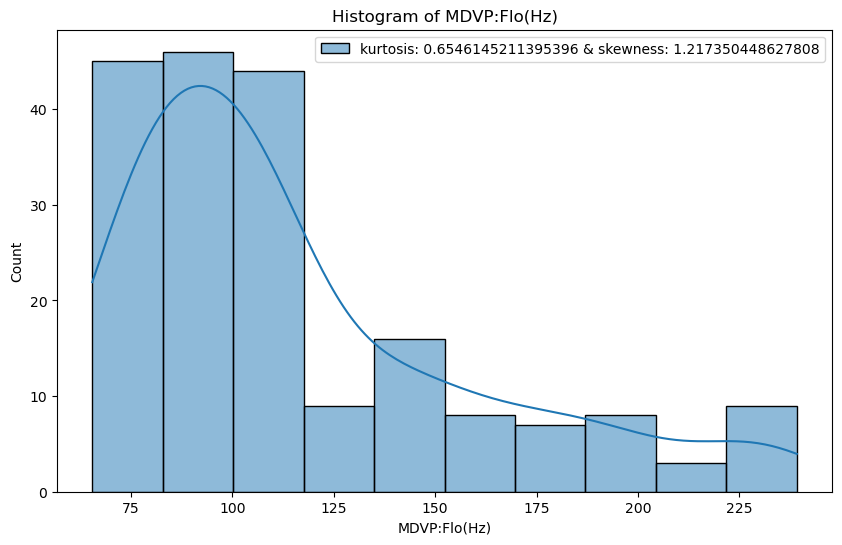

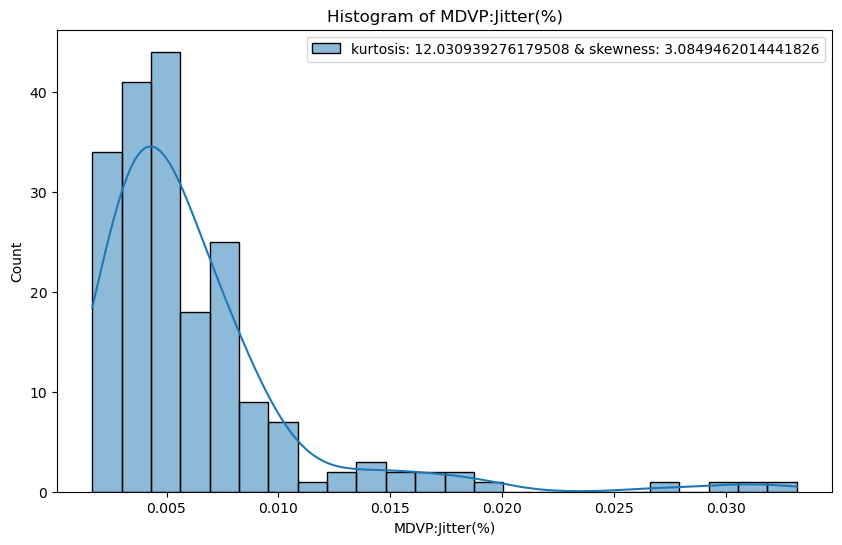

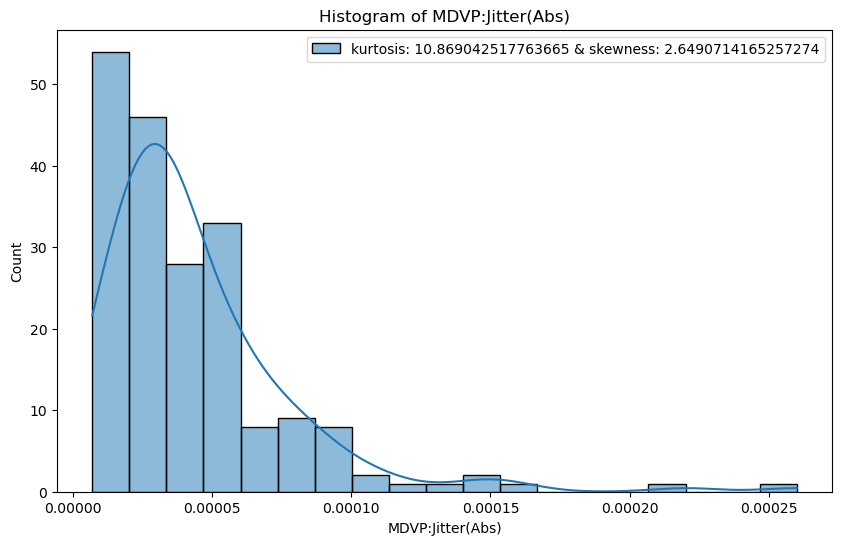

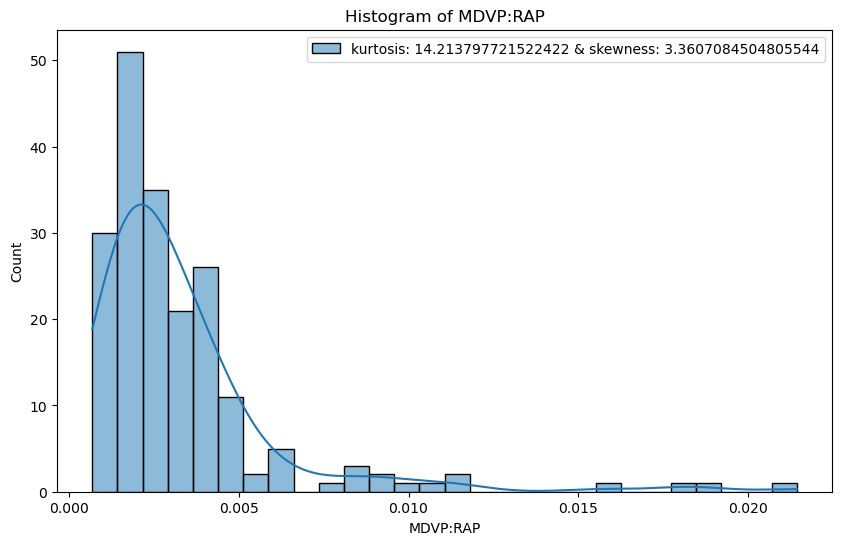

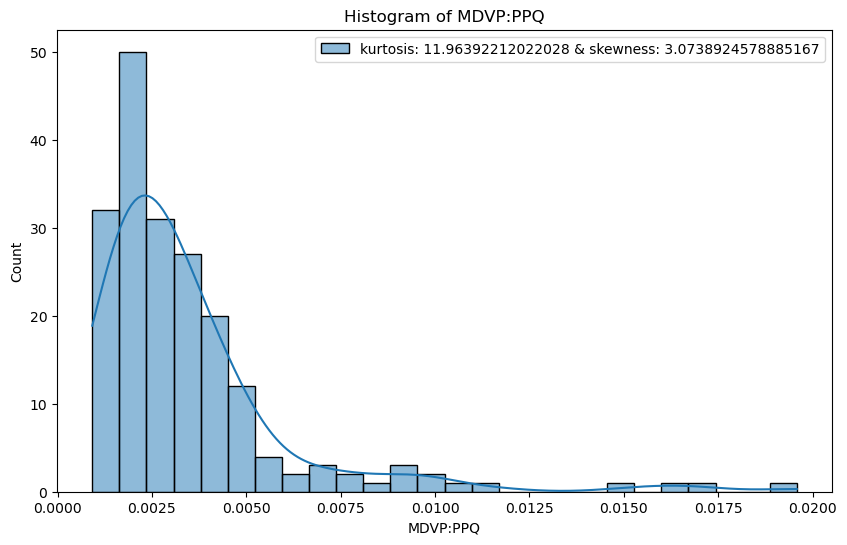

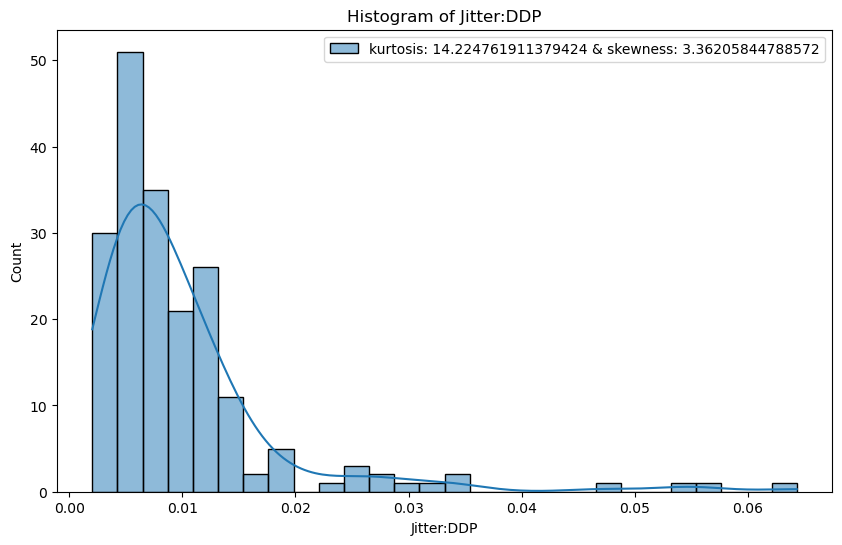

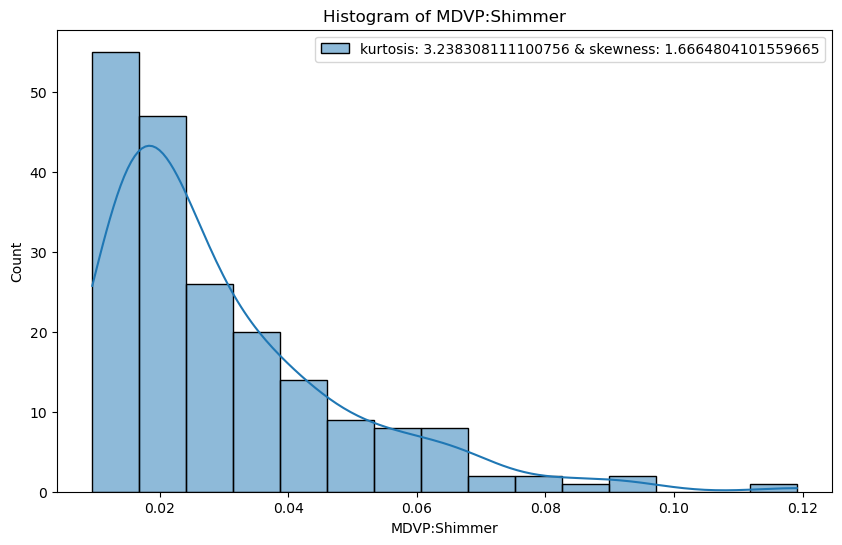

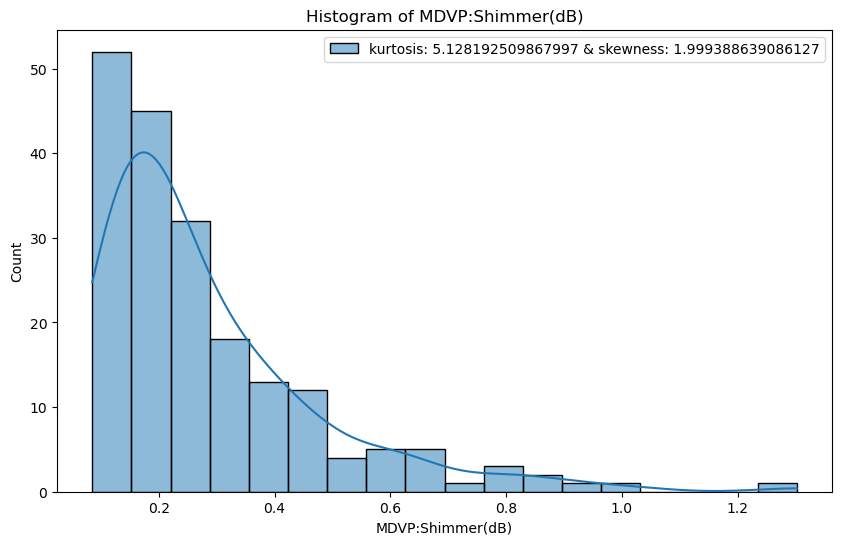

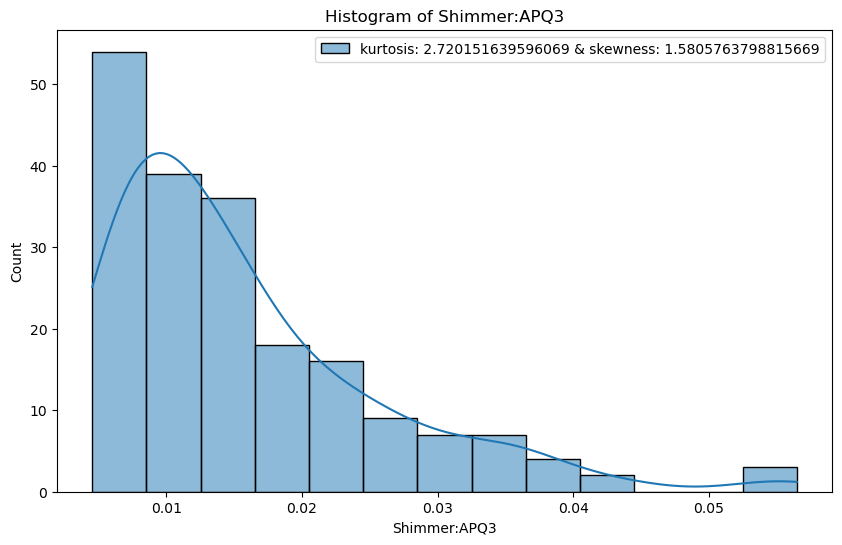

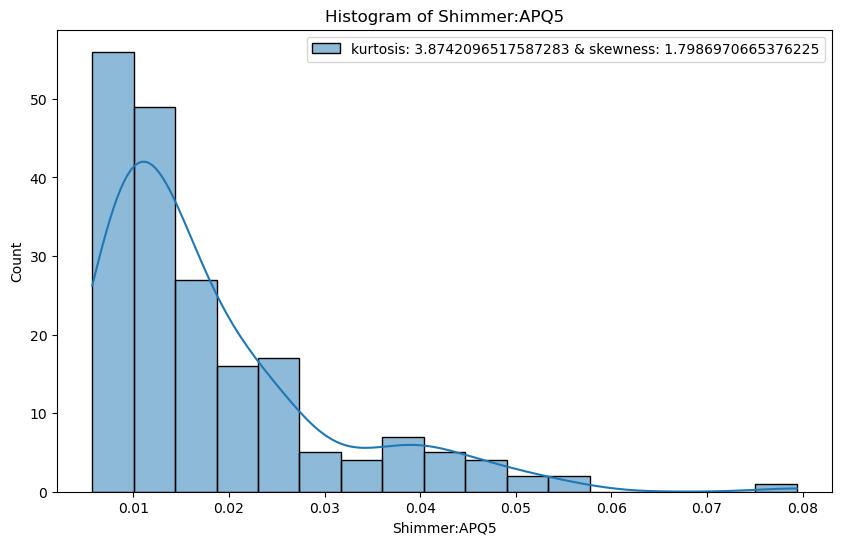

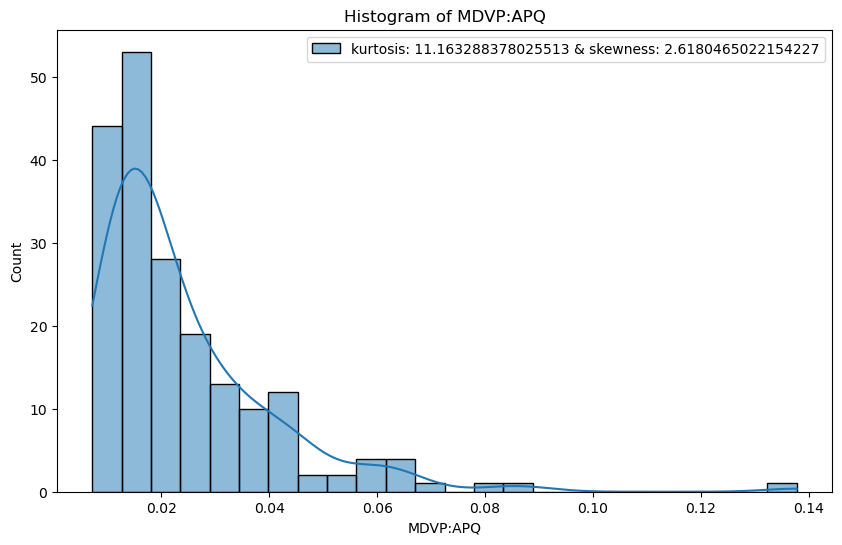

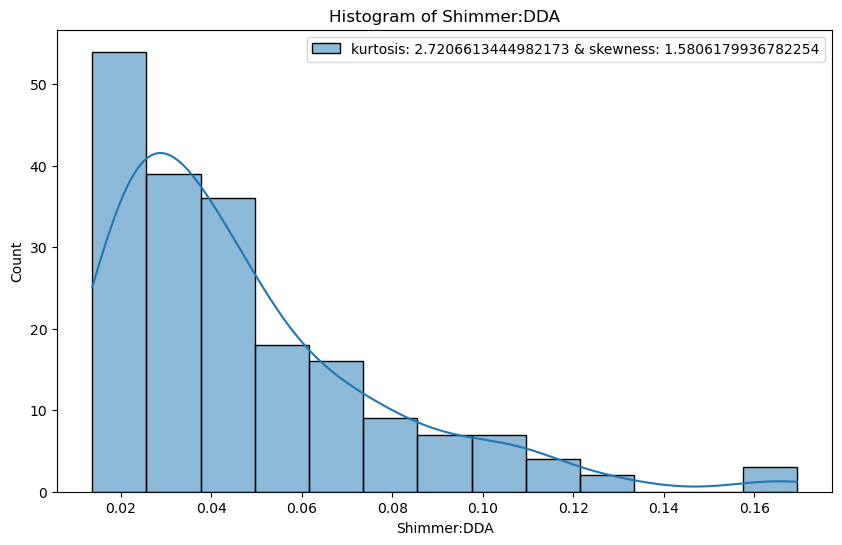

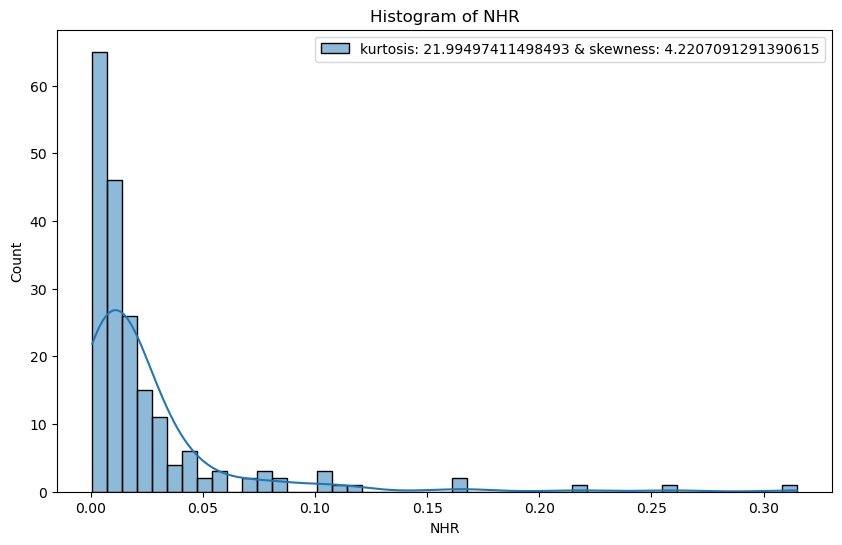

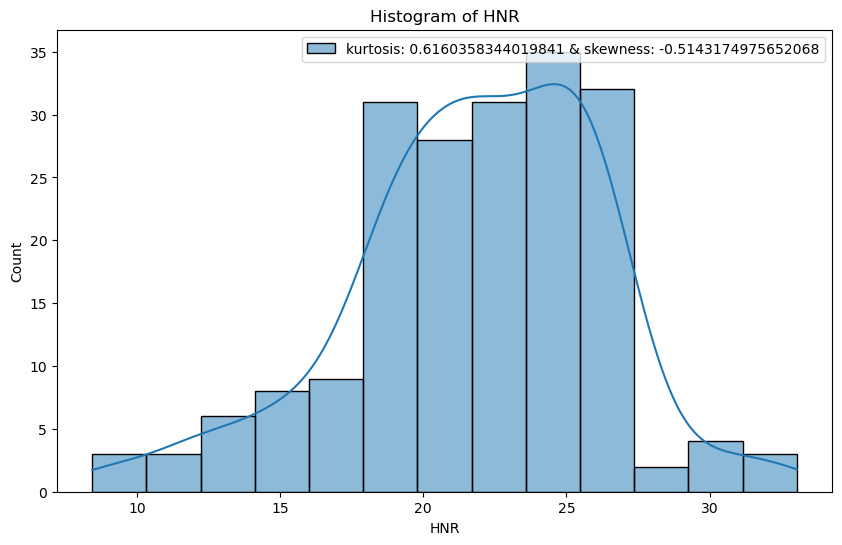

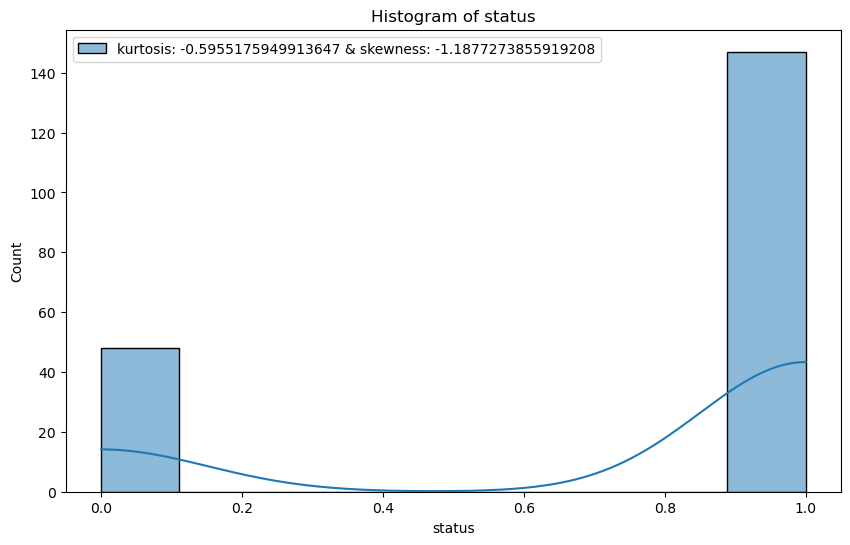

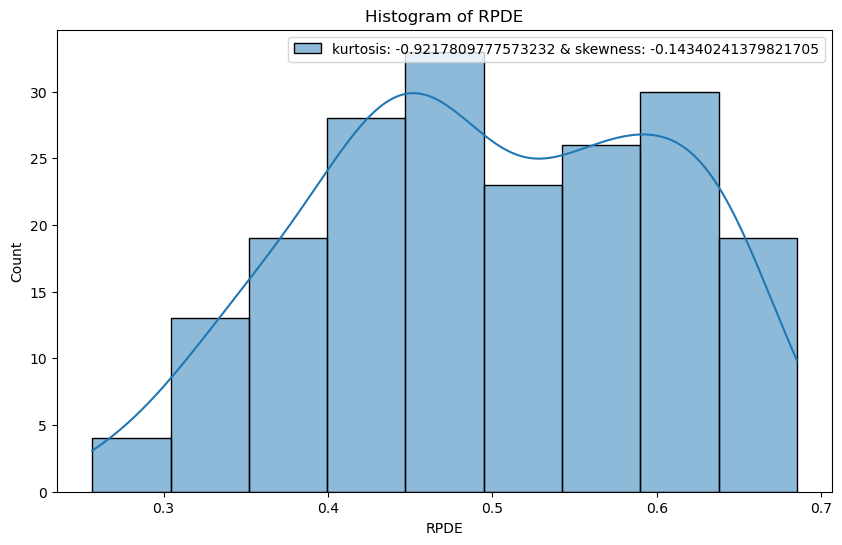

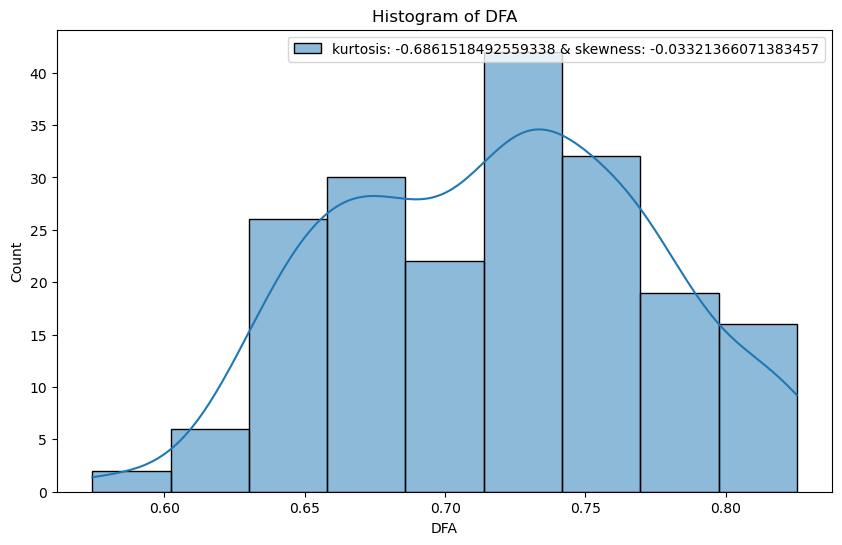

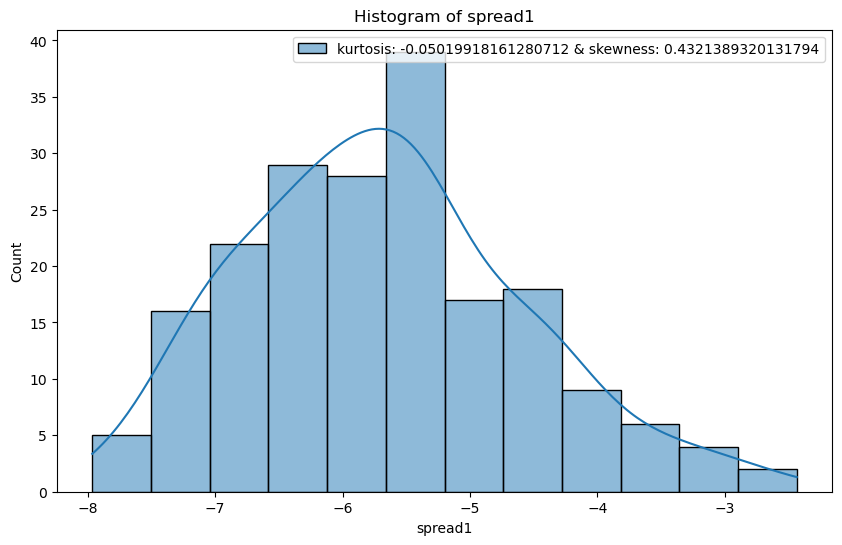

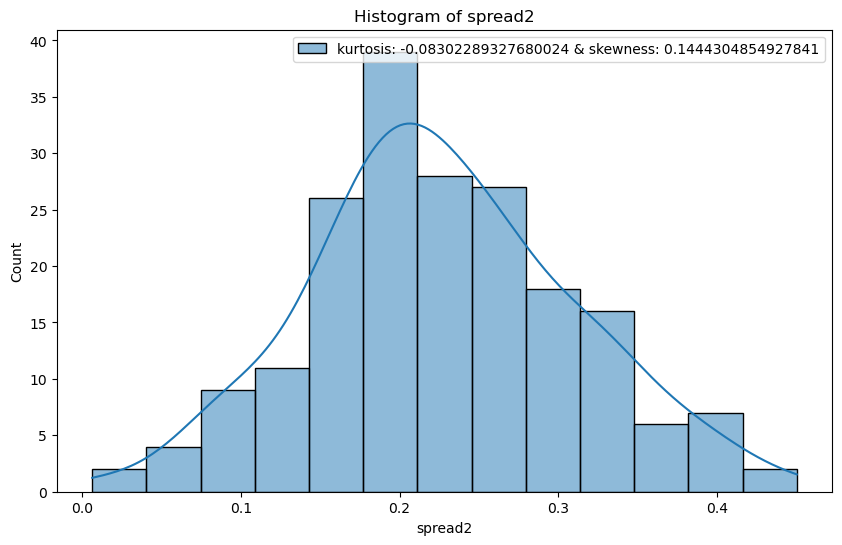

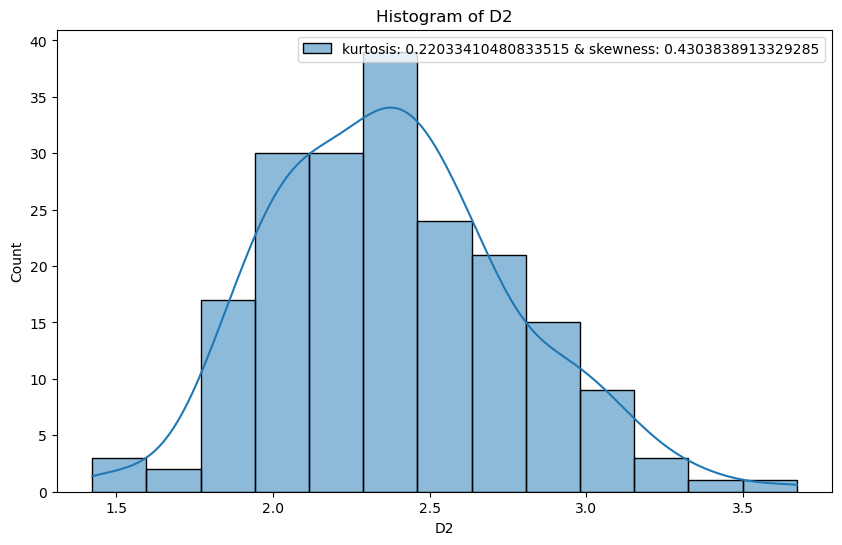

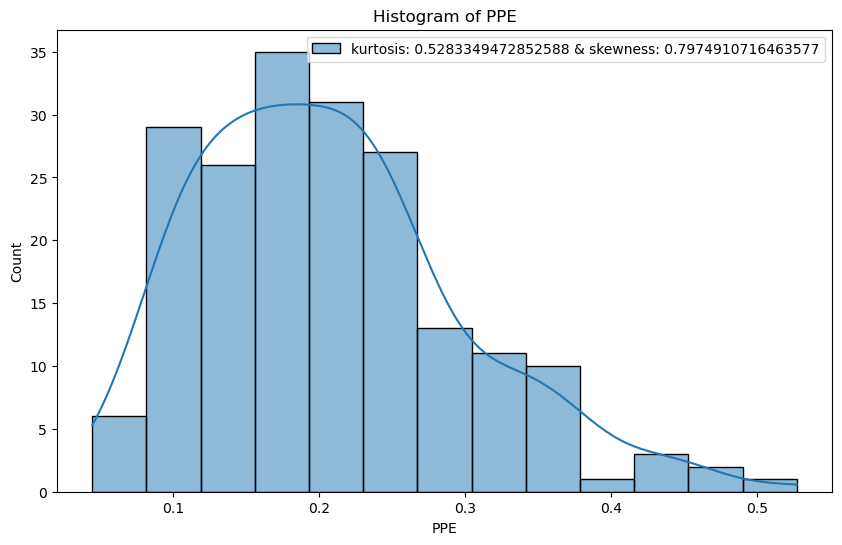

In [37]:
#see the histogramplots column wise
for column in PD:
    plt.figure(figsize=(10, 6))
    k = PD[column].kurt() #kurtosis
    s = PD[column].skew() #Skewness
    sns.histplot(PD[column], kde=True, label= f'kurtosis: {k} & skewness: {s}')
    plt.title(f'Histogram of {column}')
    plt.legend()
    plt.show()

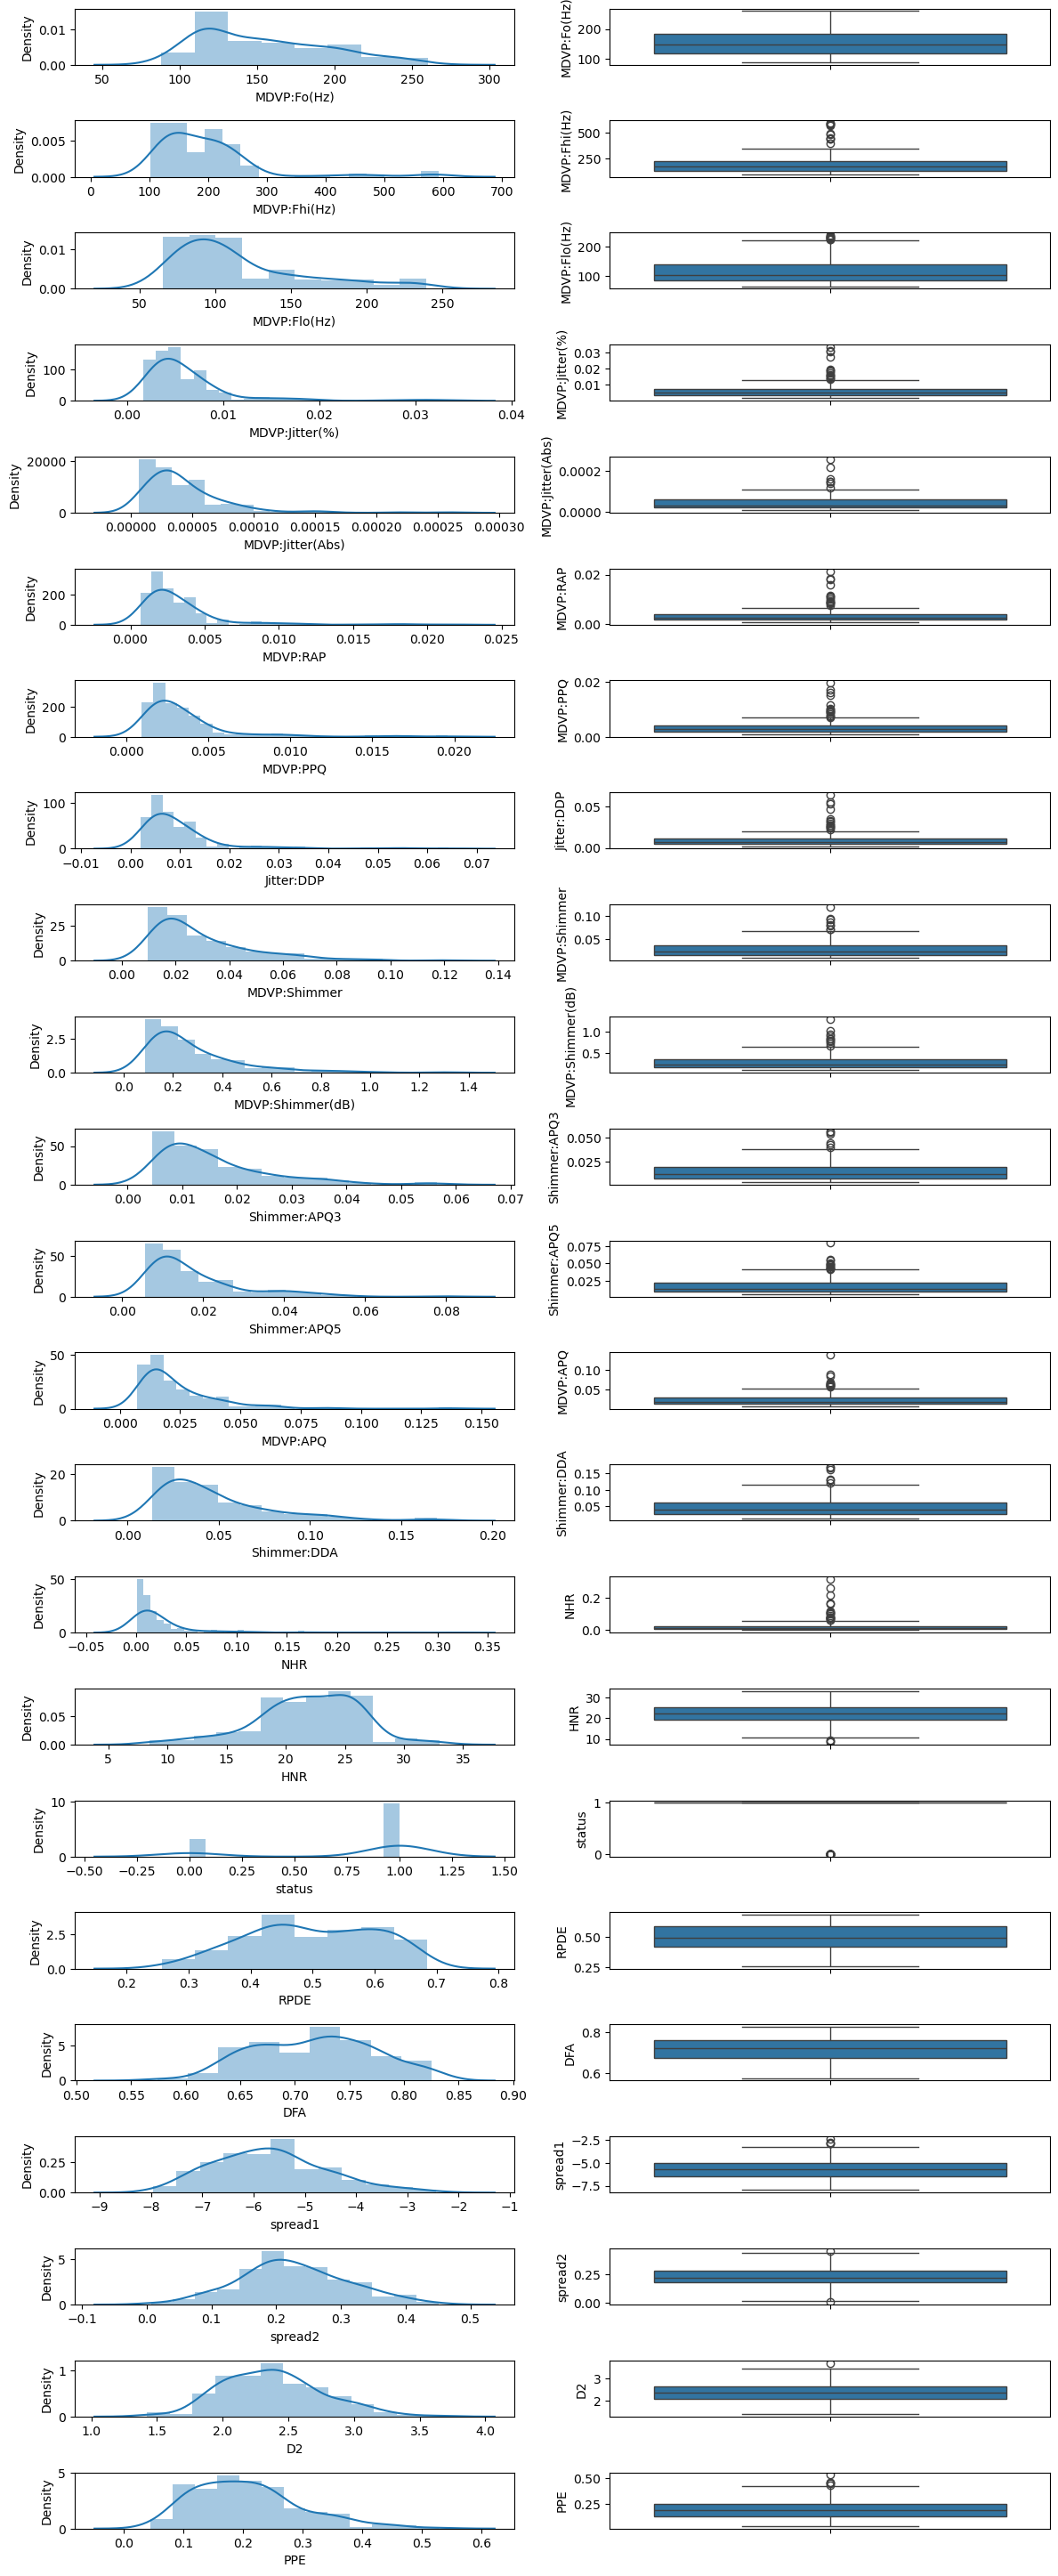

In [38]:
a=1
plt.figure(figsize=(12,50))
for i in PD:
    if PD[i].dtype!="object":
       plt.subplot(40,2,a)
       sns.distplot(PD[i])
       plt.subplot(40,2,a+1)
       sns.boxplot(PD[i])
       a+=2
plt.tight_layout()    
plt.show()


* After Deleted HIGH_corr_columns remaing columns distplots

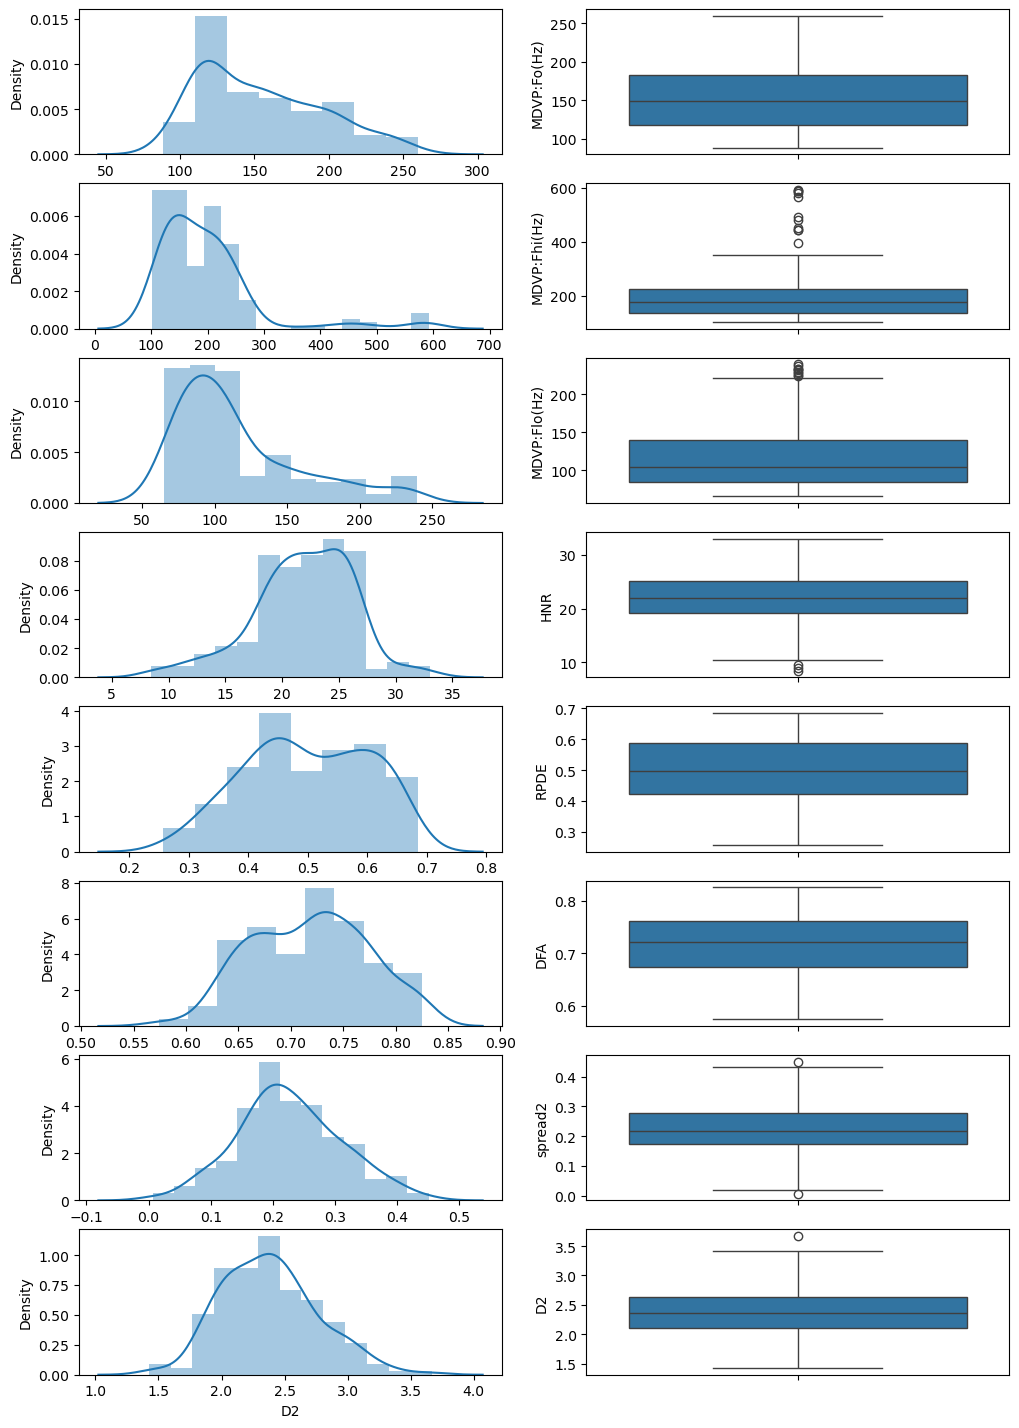

In [40]:
a=1
plt.figure(figsize=(12,20))
for i in Z:
    if PD[i].dtype!="object":
       plt.subplot(9,2,a)
       sns.distplot(PD[i])
       plt.subplot(9,2,a+1)
       sns.boxplot(PD[i])
       a+=2
plt.show()

In [41]:
# create the dictionaries for statistics
mean = {}
std = {}
max = {}
min = {}
var = {}


# Calculate statistics for each column
for i in PD.columns:
    mean[i] = PD[i].mean()
    std[i] = PD[i].std()
    max[i] =  PD[i].max()
    min[i] = PD[i].min()
    var[i] = PD[i].var()
    
    
    
# printing statistis for each column using with For loop  
    print(f"Column: {i}")
    print(f"Mean: {mean[i]}")
    print(f"Standard Deviation: {std[i]}")
    print(f"Max: {max[i]}")
    print(f"Min: {min[i]}")
    print(f"Var: {var[i]}")
    print('-----'*10)

Column: MDVP:Fo(Hz)
Mean: 154.22864102564102
Standard Deviation: 41.39006474907147
Max: 260.105
Min: 88.333
Var: 1713.1374599323287
--------------------------------------------------
Column: MDVP:Fhi(Hz)
Mean: 197.10491794871797
Standard Deviation: 91.49154763503036
Max: 592.03
Min: 102.145
Var: 8370.703288653029
--------------------------------------------------
Column: MDVP:Flo(Hz)
Mean: 116.32463076923077
Standard Deviation: 43.521413181993644
Max: 239.17
Min: 65.476
Var: 1894.1134053578098
--------------------------------------------------
Column: MDVP:Jitter(%)
Mean: 0.006220461538461538
Standard Deviation: 0.004848133692602562
Max: 0.03316
Min: 0.00168
Var: 2.3504400301348154e-05
--------------------------------------------------
Column: MDVP:Jitter(Abs)
Mean: 4.395897435897436e-05
Standard Deviation: 3.482190859976327e-05
Max: 0.00026
Min: 7e-06
Var: 1.212565318530267e-09
--------------------------------------------------
Column: MDVP:RAP
Mean: 0.003306410256410257
Standard Devi

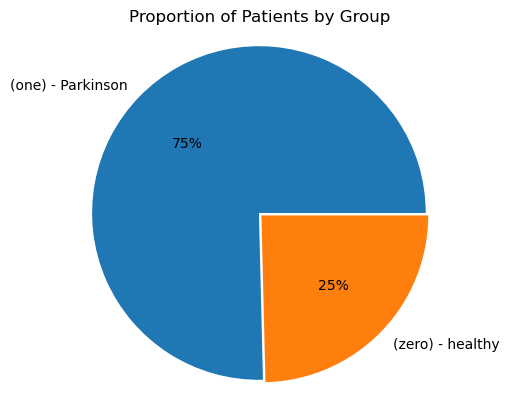

In [42]:
plt.pie(x=PD.status.value_counts(),labels=['(one) - Parkinson','(zero) - healthy'],autopct='%.0f%%',explode= [0.02,0.001])
plt.title("Proportion of Patients by Group")
plt.axis('equal');

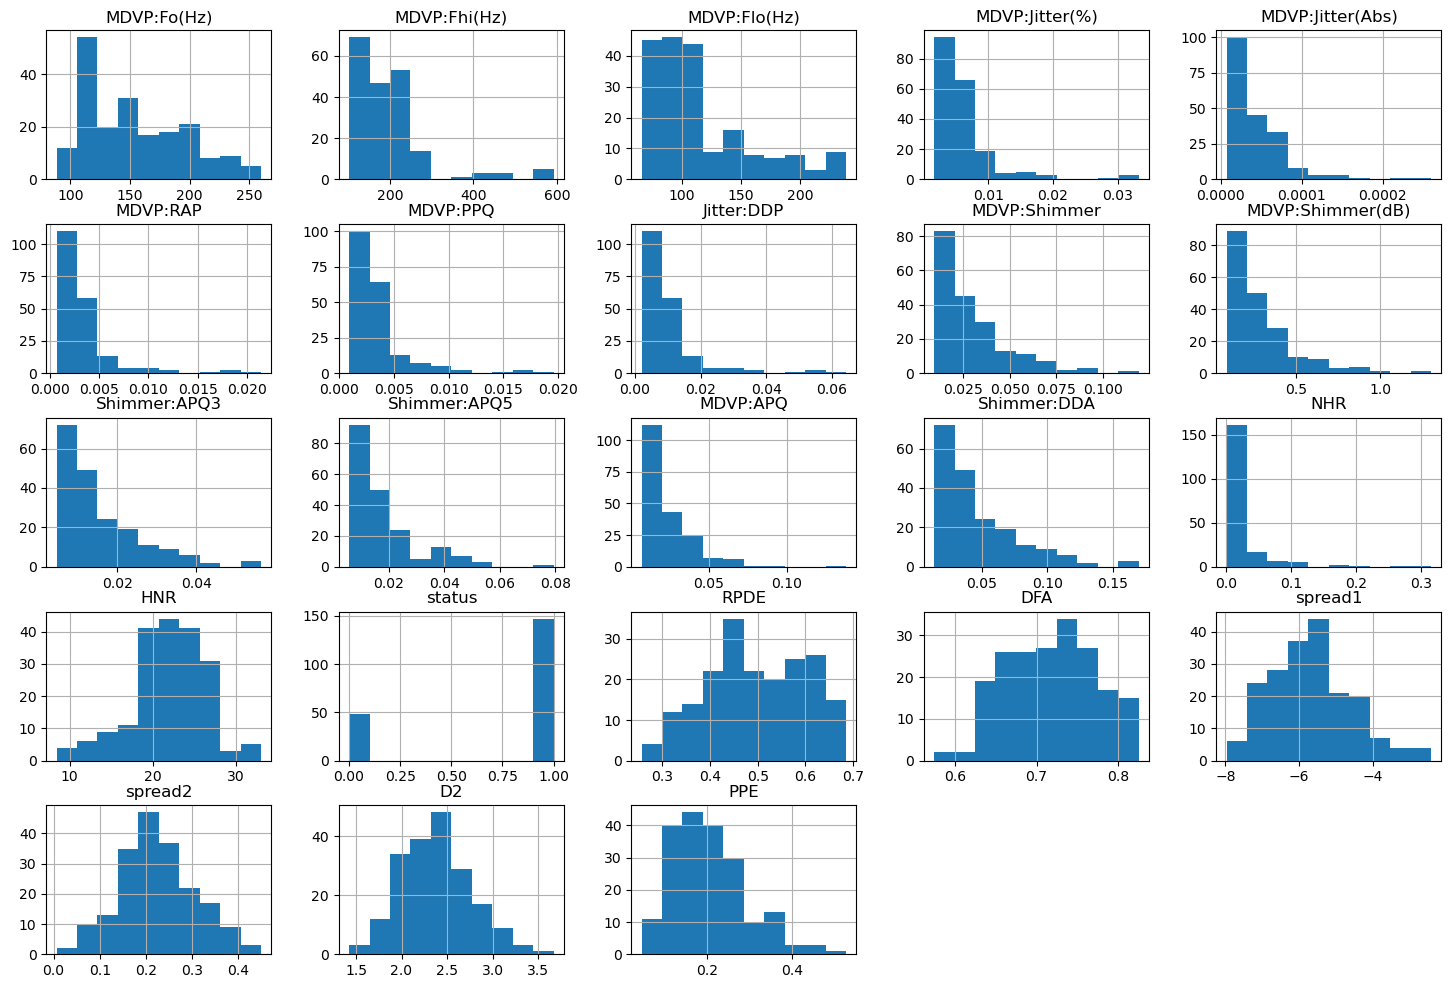

In [43]:

PD.hist(figsize=(18,12));

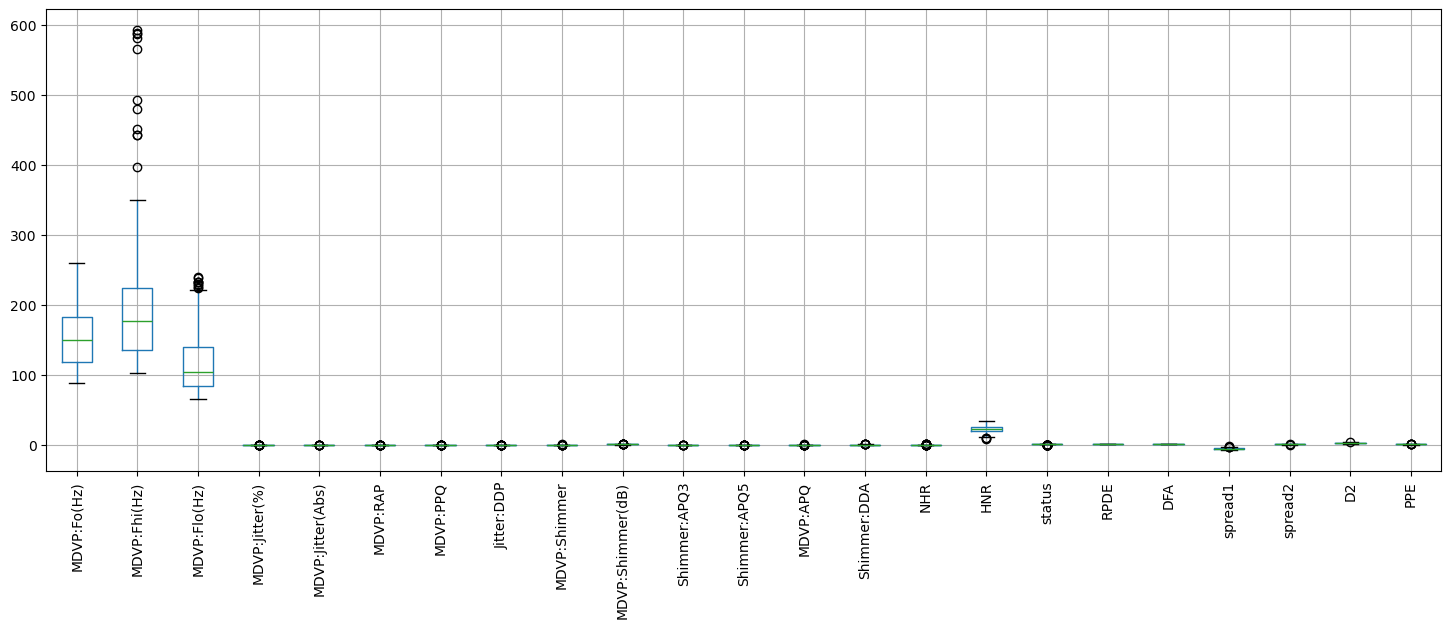

In [44]:
#boxplot of all columns
PD.boxplot(figsize=(18,6))
plt.xticks(rotation=90);

In [45]:
df=PD.copy()
X=df.drop('status',axis= 1)
y= df['status']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [47]:
# Create Models
models= [XGBClassifier(random_state=42),
    DecisionTreeClassifier(max_depth=8,min_samples_split=2,criterion="entropy",random_state=42),
    RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=3,max_depth=12,random_state=42)
]

In [48]:
#predicted of models
for i in models:
    i.fit(X_train,y_train)
    pred= i.predict(X_test)
    
    print(i)
    accuracy = accuracy_score(y_test, pred)
    print(f'Accuracy: {accuracy:.3f}')
    print(classification_report(y_test,pred))
    
    print('_____'*15)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy: 0.932
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg

In [49]:
Resamples=[
    RandomOverSampler(sampling_strategy=0.6, random_state=42),
    ADASYN(sampling_strategy=0.6, random_state=42),
    SMOTE(sampling_strategy=0.6, random_state=42),
    TomekLinks()
]

for i in Resamples:
    X_resampled, y_resampled = i.fit_resample(X_train, y_train)


This code resamples the training data using four techniques to handle class imbalance in the dataset.

**Techniques:**

1. `RandomOverSampler`: Randomly selects minority class samples.
2. `ADASYN`: Generates new minority class samples by interpolating between existing ones.
3. `SMOTE` (Synthetic Minority Over-sampling Technique): Generates new minority class samples by interpolating between existing ones.
4. `TomekLinks`: Removes minority class samples that are most dissimilar to each other.

**Process:**

1. `fit_resample` method is used to resample training data (`X_train` and `y_train`) for each technique.
2. Resampled data is stored in `X_resampled` and `y_resampled`.
3. `random_state` is set to 42 for reproducibility.
4. Loop iterates over each technique, applying it to the training data and storing results.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [52]:
for j in Resamples:
   
    for i in models:
        i.fit(X_resampled,y_resampled)
        pred= i.predict(X_test)
        print(i)
        
        print(j)
        
        print(Counter(y_train))
        
        print(Counter(y_resampled))
        accuracy = accuracy_score(y_test, pred)
        print(f'Accuracy: {accuracy:.3f}')
        print(classification_report(y_test,pred))
        print('-----'*15)
    print('_______'*14)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)
RandomOverSampler(random_state=42, sampling_strategy=0.6)
Counter({1: 68, 0: 23})
Counter({1: 98, 0: 33})
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        30

    accuracy  

The code evaluates the performance of each model for each resampling technique. 

**Steps:**

1. Iterate over each resampling technique.
2. For each resampling technique, iterate over each model.
3. Fit the model to resampled training data (`X_resampled` and `y_resampled`), make predictions on test data (`X_test`), calculate accuracy using `accuracy_score`, print a classification report, and separate the output with dashes.
4. Print another line of dashes after evaluating all models for a given resampling technique.

**Purpose:** Easy comparison of model performance using different resampling techniques.

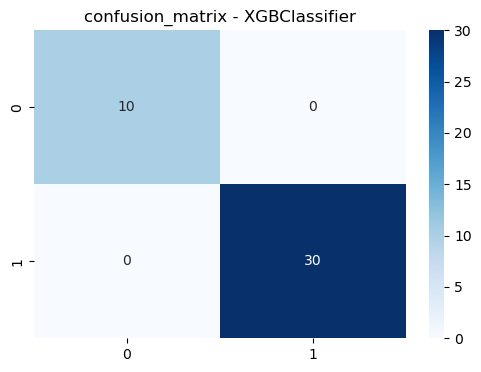

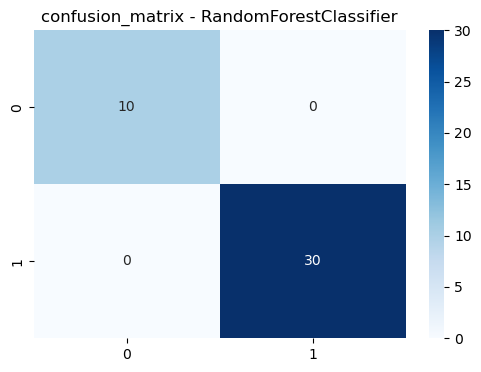

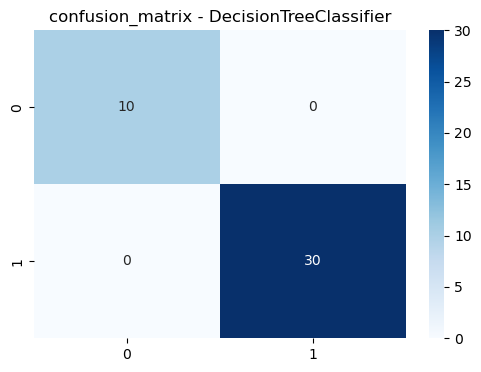

In [54]:
models= {
    'XGBClassifier':XGBClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    
}
def plot_confusion_matrix(y_test, pred, model_name):
    cm = confusion_matrix(y_test,pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, cmap='Blues',)
    plt.title(f'confusion_matrix - {model_name}')
    plt.show()
    
for name, model in models.items():
    
    model.fit(X_resampled, y_resampled)
    pred = model.predict(X_test)
    plot_confusion_matrix(y_test,pred, name)
      

The code evaluates the performance of 3 machine learning models (XGBoost, Random Forest, Decision Tree) on a classification problem.

**Key Points:**

* Creates a dictionary of models: XGBoost, Random Forest, Decision Tree
* Defines a function to plot confusion matrices for each model
* Fits each model to resampled training data and makes predictions on test data
* Plots confusion matrices using the `plot_confusion_matrix` function
* Compares the performance of each model by visualizing their confusion matrices

In [56]:
# Define models to test
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}
#  Metrics
testing_accuracy = {}
precision_test = {}
recall_test = {}
f1_test = {}

# Train, test, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Testing Accuracy Score
    testing_accuracy[name] = model.score(X_test, y_test)
    
    
    # Precision Score
    y_pred = model.predict(X_test)
    precision_test[name] = precision_score(y_test, y_pred)
    
    # Recall Score
    recall_test[name] = recall_score(y_test, y_pred)
    
    # F1-Score Score
    f1_test[name] = f1_score(y_test, y_pred)

The code trains and evaluates three machine learning models (Decision Trees, Random Forest, XGBoost) on a classification problem.

**Key Points:**

* Defines a dictionary `models` containing the three machine learning models
* Initializes dictionaries to store metrics for each model: `testing_accuracy`, `precision_test`, `recall_test`, and `f1_test`
* Loops through each model in the dictionary:
	+ Trains the model on resampled training data (`X_resampled` and `y_resampled`)
	+ Evaluates the model on test data (`X_test` and `y_test`)
	+ Stores the testing accuracy, precision, recall, and F1-score for each model in the respective dictionaries

The code aims to compare the performance of each model by calculating and storing various metrics for each model.

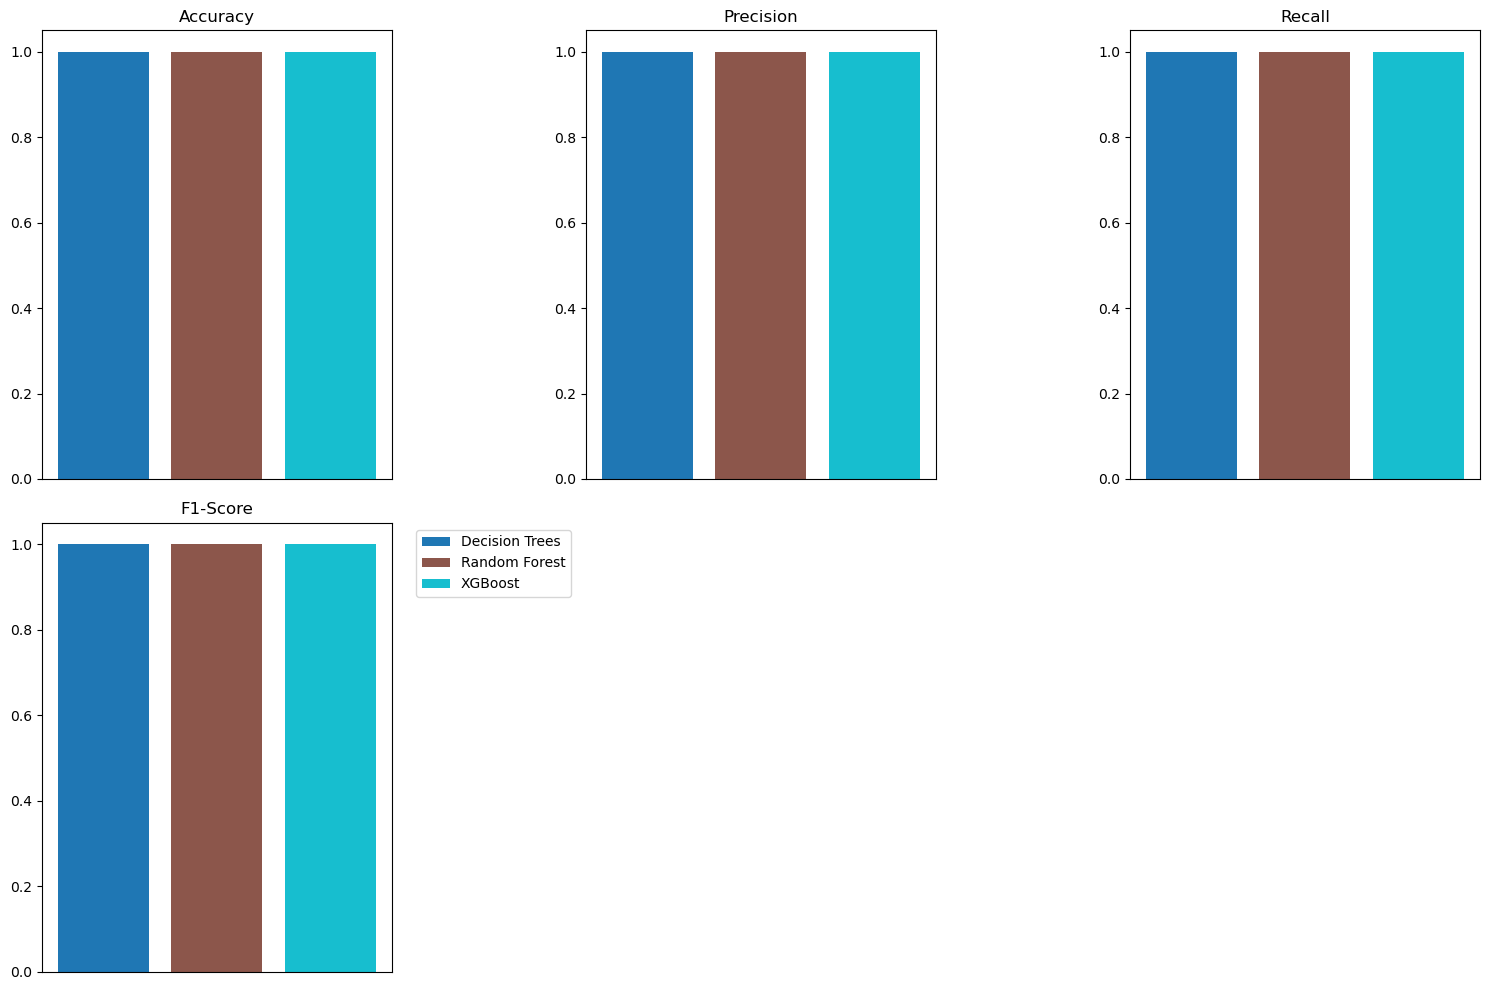

In [58]:
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = [testing_accuracy, precision_test, recall_test, f1_test]

# Define colors for each model
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))  # Generate colors from the 'tab10' colormap

# Plotting
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metric_names):
    plt.subplot(2, 3, i+1)
    for j, model_name in enumerate(models.keys()):
        plt.bar(model_name, scores[i][model_name], color=colors[j], label=model_name)
    plt.title(metric)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=True)
plt.tight_layout()
plt.show()

The code creates a bar plot to compare the performance of three machine learning models: Decision Trees, Random Forest, and XGBoost. The code defines lists for metric names, scores, and colors, then loops through each metric to create a subplot with bars for each model's score. The plot includes a legend and is formatted for easy comparison.

**Neural Networks**

In [61]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(80,input_shape=(X_resampled.shape[1],),activation='relu'),
    tf.keras.layers.Dense(40,activation='relu'), # hiden layers of Neural Networks
    tf.keras.layers.Dense(8,activation='relu'),  # hiden layers of Neural Networks
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [62]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
hist = model.fit(X_resampled,y_resampled,epochs=98,batch_size=22,verbose=0)

In [64]:
hist_df = pd.DataFrame(hist.history) 

In [65]:
hist_df.head()

,accuracy,loss
0,0.709924,7.704822
1,0.396947,1.726084
2,0.748092,1.177141
3,0.557252,0.811378
4,0.648855,0.617783


<Axes: >

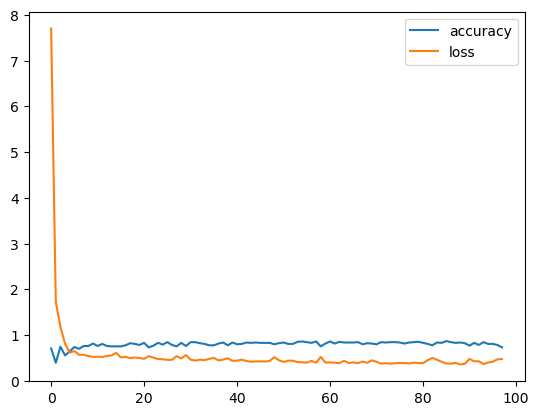

In [66]:
#ploting of the data history
hist_df.plot()

In [67]:
loss,accuracy = model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7771 - loss: 0.4661   


In [68]:
accuracy

0.7749999761581421

In [69]:
viz= pd.DataFrame({'actual':y_test,'predict':y_pred}).reset_index()

In [70]:
del viz['index']

In [71]:
viz

,actual,predict
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
